In [7]:
import pandas as pd

data = pd.read_csv('./per_frame_delay_fixed.csv')

data["rho"] = data["rho"].replace({
    0.0: r"$ \rho_0 $",
    0.5: r"$ \rho_2 $",
    0.25: r"$ \rho_4 $",
    0.125: r"$ \rho_8 $"
}).astype(pd.CategoricalDtype(
    reversed([r"$ \rho_2 $", r"$ \rho_4 $", r"$ \rho_8 $", r"$ \rho_0 $"]),
    ordered=True,
))

data["scale"] = data["scale"].astype(pd.CategoricalDtype([0.1, 0.2, 0.4, 0.8, 1.6, 3.2], ordered=True))

data["model"] = data["model"].replace({
    "first-order": "Ref. Stochastic",
    "first-order-median": "Ref. Median",
    "3rd-poly-low": "3rd Order Poly. (low neuroticism)",
    "3rd-poly-high": "3rd Order Poly. (high neuroticism)",
    "legacy": "Legacy EdgeDroid 1.0"
}).astype("category")

data

,step_number,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,model,rep,s_param,rho,scale
0,0,0.132718,0.000000,0.132718,0.132718,0.000000,1,3rd Order Poly. (low neuroticism),0,1.2,$ \rho_0 $,0.1
1,1,0.110745,4.945128,5.120188,0.175060,0.064315,27,3rd Order Poly. (low neuroticism),0,1.2,$ \rho_0 $,0.1
2,2,0.227984,4.969214,5.281430,0.312216,0.084233,29,3rd Order Poly. (low neuroticism),0,1.2,$ \rho_0 $,0.1
3,3,0.091701,5.039897,5.191353,0.151457,0.059756,20,3rd Order Poly. (low neuroticism),0,1.2,$ \rho_0 $,0.1
4,4,0.079322,4.335370,4.437435,0.102065,0.022743,19,3rd Order Poly. (low neuroticism),0,1.2,$ \rho_0 $,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
214195,46,7.503662,5.230947,16.750865,11.519918,4.016256,2,Ref. Median,29,1.2,$ \rho_2 $,3.2
214196,47,1.668929,5.230947,8.197914,2.966967,1.298038,3,Ref. Median,29,1.2,$ \rho_2 $,3.2
214197,48,12.675503,5.230947,18.368428,13.137481,0.461978,4,Ref. Median,29,1.2,$ \rho_2 $,3.2
214198,49,17.917073,5.230947,34.462043,29.231096,11.314023,2,Ref. Median,29,1.2,$ \rho_2 $,3.2


In [9]:
data.groupby(["model", "rho", "scale"], observed=True).count()

step_number  \
model                              rho        scale                
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1           1530   
                                              0.2           1530   
                                              0.4           1530   
                                              0.8           1530   
                                              1.6           1530   
...                                                          ...   
Ref. Stochastic                    $ \rho_2 $ 0.2           1530   
                                              0.4           1530   
                                              0.8           1530   
                                              1.6           1530   
                                              3.2           1530   

                                                     last_frame_rtt  \
model                              rho        scale                   
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1              1530   
                                              0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
...                                                             ...   
Ref. Stochastic                    $ \rho_2 $ 0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
                                              3.2              1530   

                                                     execution_time  \
model                              rho        scale                   
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1              1530   
                                              0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
...                                                             ...   
Ref. Stochastic                    $ \rho_2 $ 0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
                                              3.2              1530   

                                                     step_duration  \
model                              rho        scale                  
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1             1530   
                                              0.2             1530   
                                              0.4             1530   
                                              0.8             1530   
                                              1.6             1530   
...                                                            ...   
Ref. Stochastic                    $ \rho_2 $ 0.2             1530   
                                              0.4             1530   
                                              0.8             1530   
                                              1.6             1530   
                                              3.2             1530   

                                                     time_to_feedback  \
model                              rho        scale                     
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1                1530   
                                              0.2                1530   
                                              0.4                1530   
                                            

In [10]:
total_durations = data.groupby(["model", "rep", "rho", "scale"], observed=True)["step_duration"].sum().reset_index()
total_durations

,model,rep,rho,scale,step_duration
0,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.1,279.587397
1,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.2,315.805294
2,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.4,392.837740
3,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.8,468.620763
4,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,1.6,834.534233
...,...,...,...,...,...
3595,Ref. Stochastic,29,$ \rho_2 $,0.2,380.627976
3596,Ref. Stochastic,29,$ \rho_2 $,0.4,391.082880
3597,Ref. Stochastic,29,$ \rho_2 $,0.8,661.222376
3598,Ref. Stochastic,29,$ \rho_2 $,1.6,693.751306


mean duration


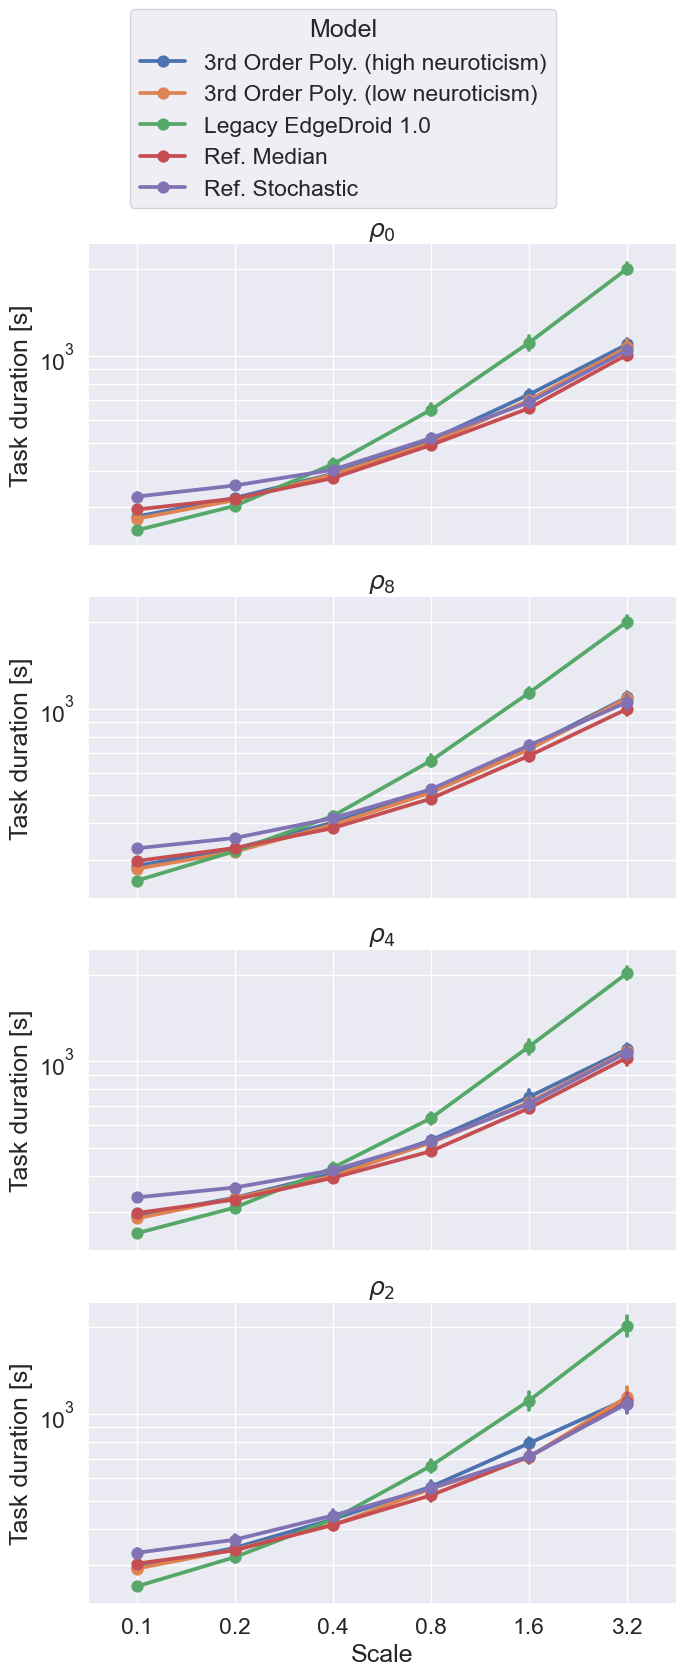

In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
sns.set(font_scale=1.5)
DOUBLE_COL_FIGW = 7.16

print("mean duration")
fg = sns.catplot(kind="point", data=total_durations, hue="model", y="step_duration", x="scale", row="rho", aspect=1, legend_out=False)
fg.set_axis_labels(r"Scale", "Task duration [s]")
fg.set_titles(row_template=r"{row_name}")
fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)
    
# fg.set(yscale="log")

fg.legend.set_title("Model")
sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.13), ncols=1)
fg.figure.set_size_inches((2*3.6, 2*7.5))
fg.tight_layout()
plt.show()

# push correlation higher

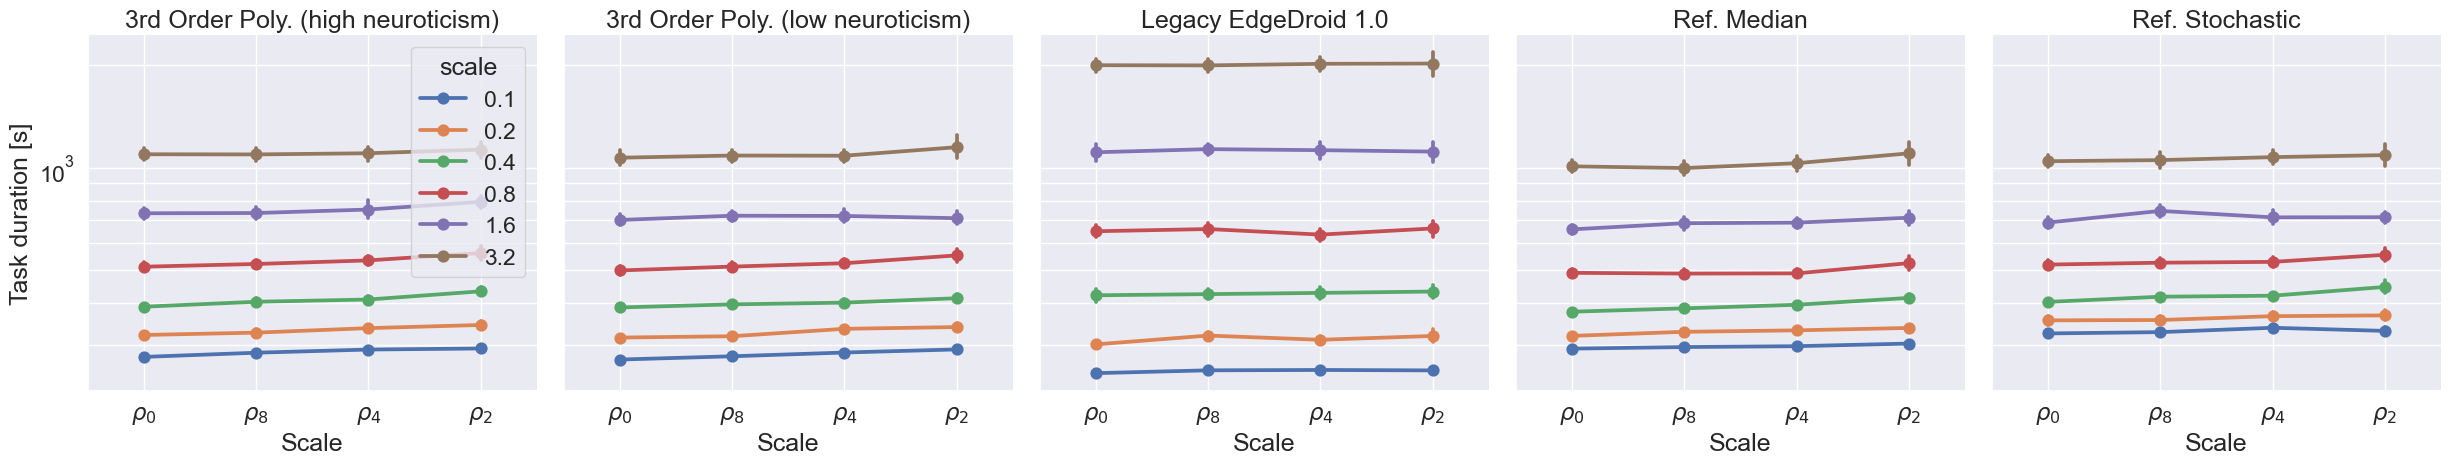

In [30]:
fg = sns.catplot(kind="point", data=total_durations, x="rho", y="step_duration", hue="scale", col="model", aspect=1, legend_out=False)
fg.set_axis_labels(r"Scale", "Task duration [s]")
fg.set_titles(row_template=r"{row_name}", col_template=r"{col_name}")
fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)

# fg.set(yscale="log")

# fg.legend.set_title("Model")
# sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.13), ncols=1)
# fg.figure.set_size_inches((2*3.6, 2*7.5))
# fg.tight_layout()
plt.show()

In [15]:
mean_total_durations = (
    total_durations
    .groupby(["model", "rho", "scale"])["step_duration"]
    .mean()
    .reset_index()
)

min_scale = mean_total_durations[mean_total_durations.scale == mean_total_durations.scale.astype(float).min()].drop(columns=["scale"]).set_index(["model", "rho"])["step_duration"].astype(float)
max_scale = mean_total_durations[mean_total_durations.scale == mean_total_durations.scale.astype(float).max()].drop(columns=["scale"]).set_index(["model", "rho"])["step_duration"].astype(float)

((max_scale - min_scale) / min_scale).sort_values(ascending=False)

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_42248/3797164928.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["model", "rho", "scale"])["step_duration"]


model                               rho       
Legacy EdgeDroid 1.0                $ \rho_0 $    7.051188
                                    $ \rho_2 $    6.990743
                                    $ \rho_4 $    6.952762
                                    $ \rho_8 $    6.888472
3rd Order Poly. (high neuroticism)  $ \rho_0 $    2.945807
3rd Order Poly. (low neuroticism)   $ \rho_2 $    2.934451
                                    $ \rho_0 $    2.924472
                                    $ \rho_8 $    2.895080
3rd Order Poly. (high neuroticism)  $ \rho_2 $    2.847409
                                    $ \rho_8 $    2.831104
3rd Order Poly. (low neuroticism)   $ \rho_4 $    2.793128
3rd Order Poly. (high neuroticism)  $ \rho_4 $    2.779779
Ref. Median                         $ \rho_2 $    2.626939
                                    $ \rho_4 $    2.453651
                                    $ \rho_0 $    2.437460
                                    $ \rho_8 $    2.362242
Ref. Stoc

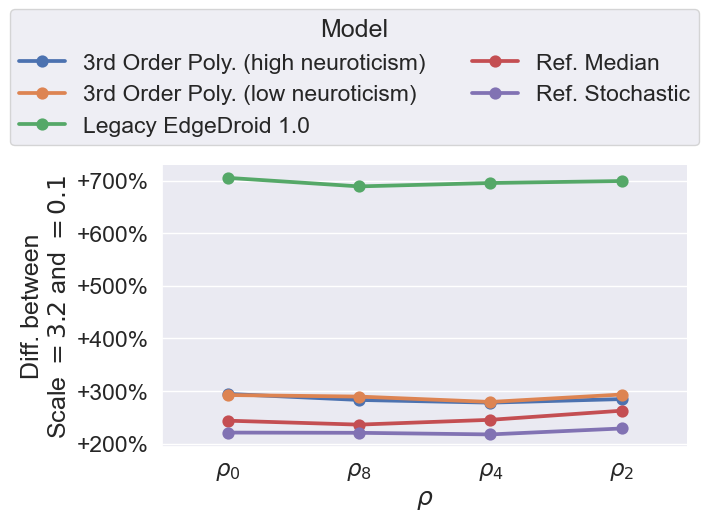

In [21]:
sns.set_context("paper")
sns.set(font_scale=1.5)

duration_increase = ((max_scale - min_scale) / min_scale).reset_index()
fg = sns.catplot(kind="point", data=duration_increase, x="rho", hue="model", y="step_duration", legend_out=False)
fg.set_axis_labels(r"$\rho$", "Diff. between\n" r"Scale $ =3.2$ and $=0.1$")
# fg.set(yscale="log")

for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter("{x:+.0%}")

sns.move_legend(fg, "upper center", title="Model", bbox_to_anchor=(.5, 1.35), ncols=2)
fg.figure.set_size_inches((2*3.6, 2*2))
fg.tight_layout()
plt.show()

mean number of frames


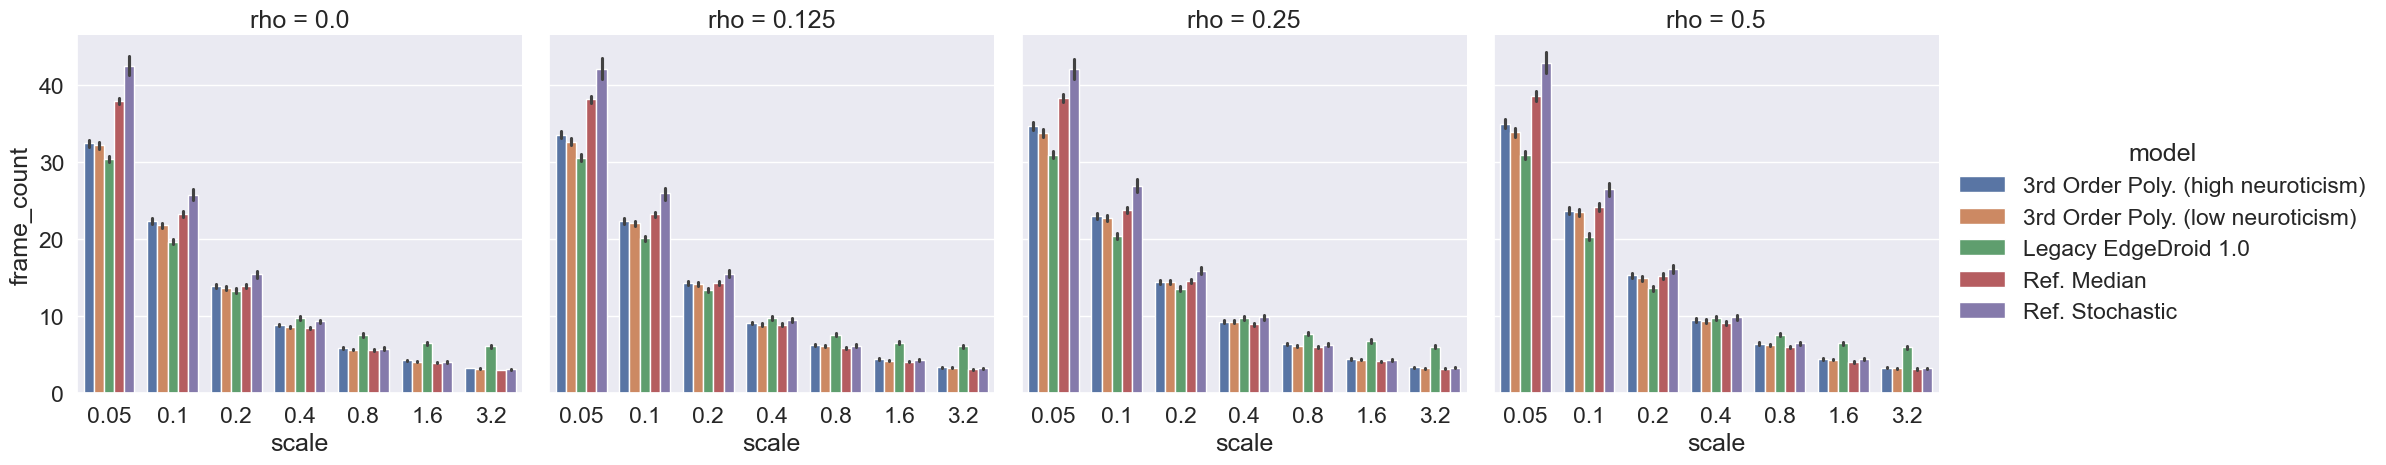

In [8]:
print("mean number of frames")
fg = sns.catplot(kind="bar", data=data, y="frame_count", hue="model", x="scale", col="rho")
plt.show()

mean TTF


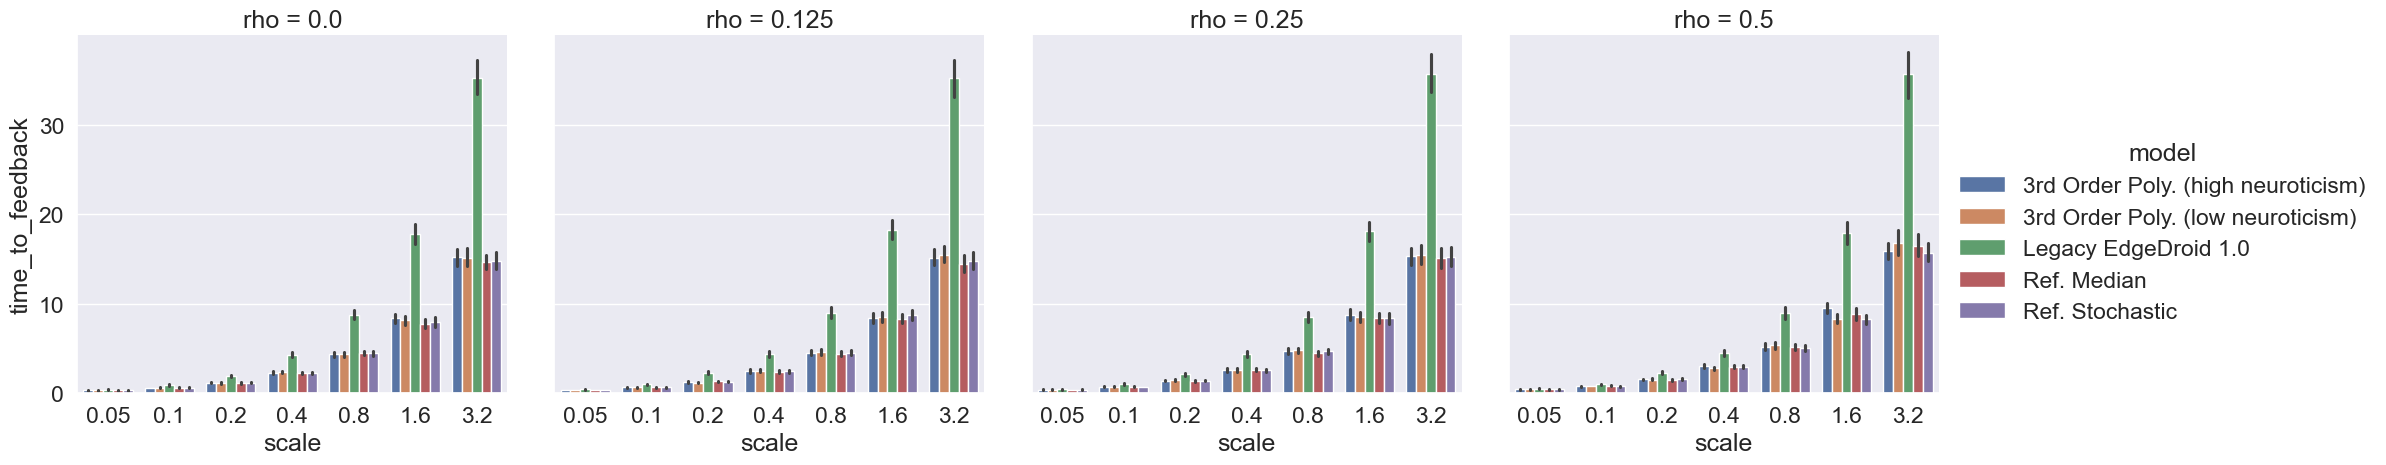

In [9]:
print("mean TTF")
fg = sns.catplot(kind="bar", data=data, hue="model", y="time_to_feedback", x="scale", col="rho")
plt.show()

mean wait time


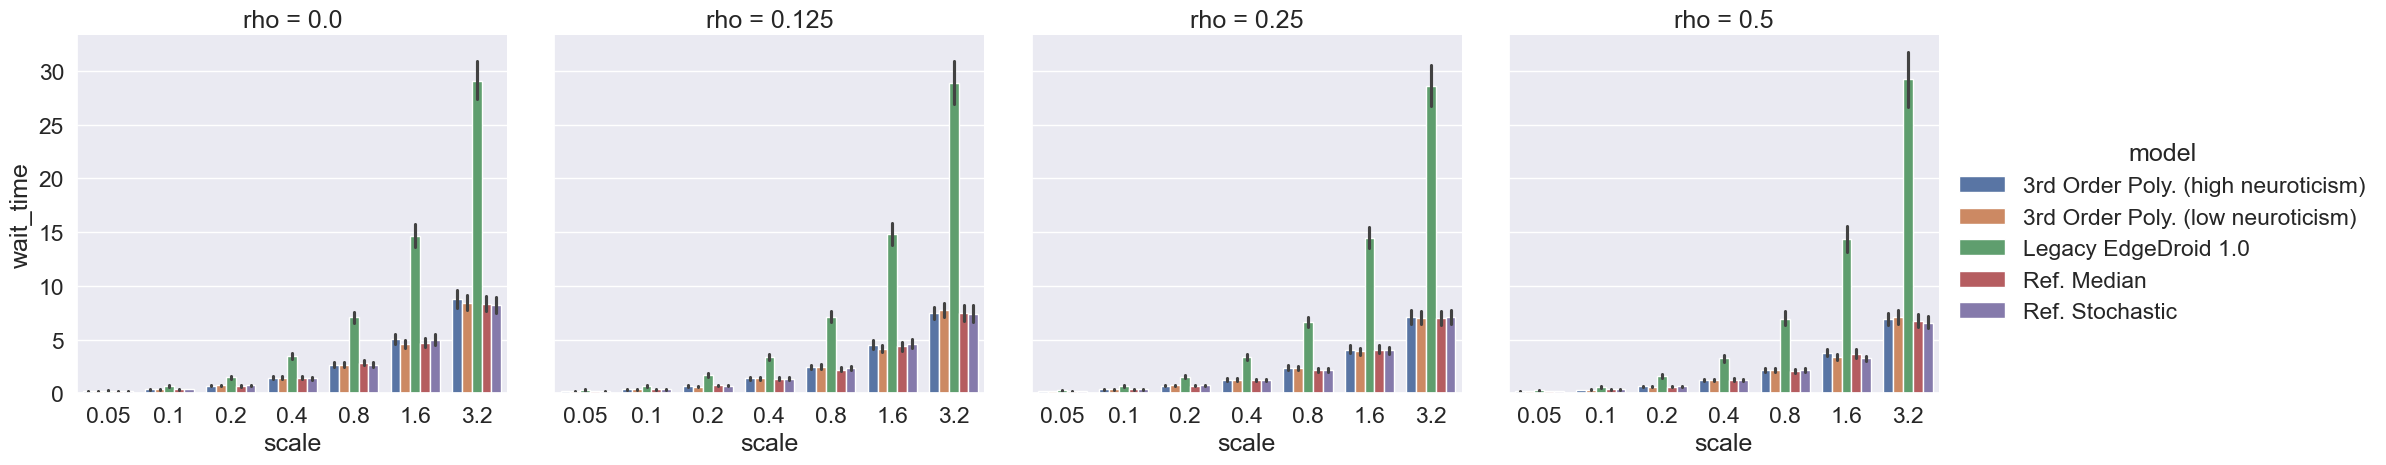

In [10]:
print("mean wait time")
fg = sns.catplot(kind="bar", data=data, hue="model", y="wait_time", x="scale", col="rho")
plt.show()

mean last frame rtt


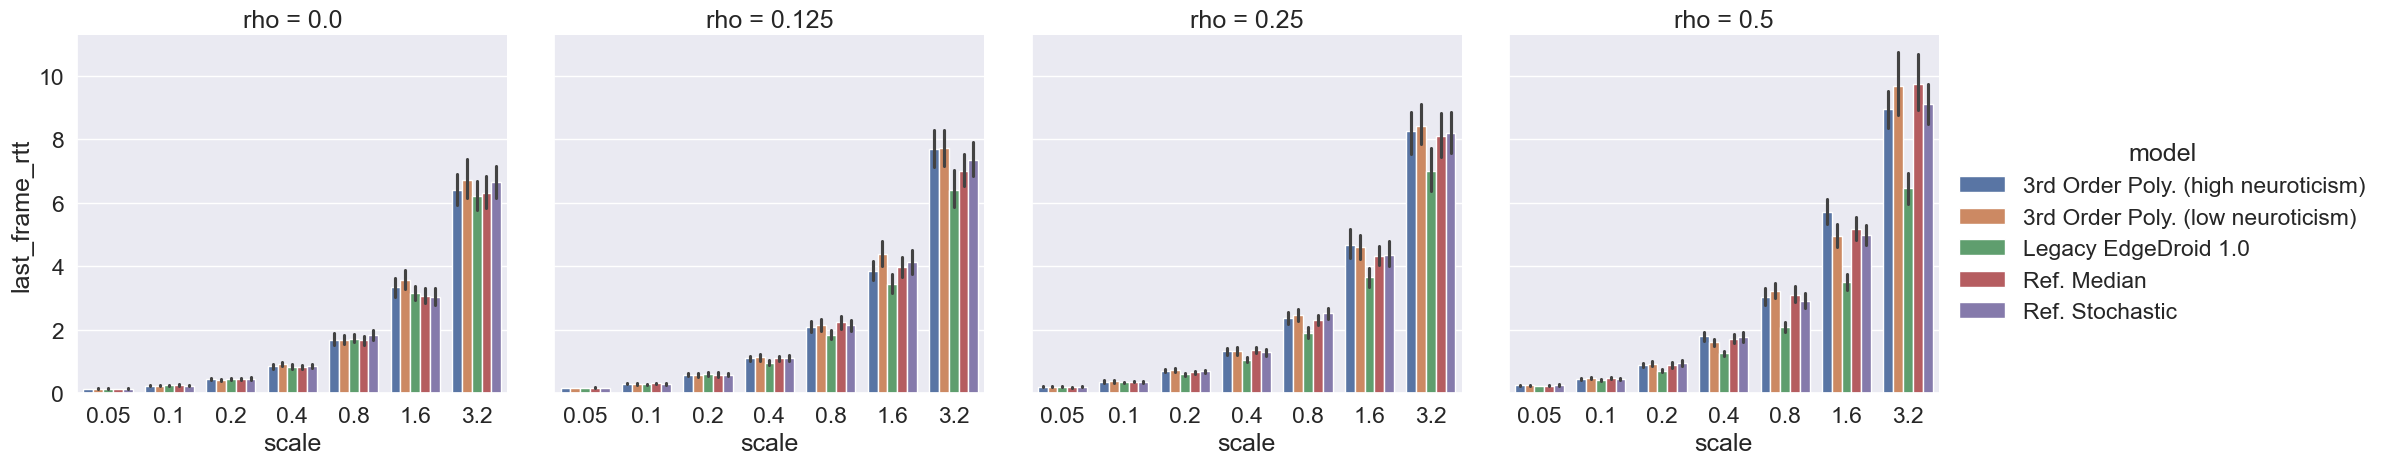

In [11]:
print("mean last frame rtt")
fg = sns.catplot(kind="bar", data=data, hue="model", y="last_frame_rtt", x="scale", col="rho")
plt.show()

In [12]:
data["rep"].max()

29